# Rendering Tutorial

This tutorial covers how to render the underlying factors into pixel-based
images. This is useful for visualization as well as pixel-based observation
spaces.

### Rendering basics

To set up a renderer, just create the corresponding rendering object.
Currently, SEGAR supports color-based rendering, which assigns a color to each
 type of object or tile, and a pattern-based renderer, which uses a
 generative model conditioned on the underlying factors.

First let's create a simulation along with some objects and tiles.

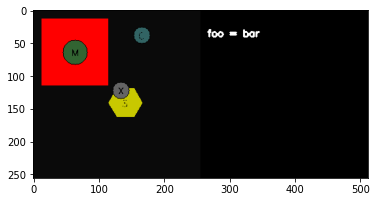

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

from segar.configs.handler import get_env_config
from segar.rendering.rgb_rendering import RGBRenderer, RGBTextureRenderer
from segar.sim import Simulator
from segar.factors import *

sim = Simulator()

sim.add_ball(position=np.array([0.05, 0.05]), text='X',
             unique_id='tennis_ball', initial_factors={Charge:-0.5})
sim.add_magnet(position=np.array([-0.5, 0.5]), text='M', 
               initial_factors={Mobile: True, Size: 0.3})
sim.add_sand(position=np.array([0.1, -0.1]), text='S', unique_id='sand_pit', 
             initial_factors={Shape: Hexagon(0.4)})
sim.add_magma(position=np.array([-0.5, 0.5]), text='G',
              initial_factors={Shape: Square(0.8)})
sim.add_charger(position=np.array([0.3, 0.7]), text='C', 
                initial_factors={Charge: 1.0, Mobile: True})

visual_config = get_env_config('visual', 'linear_ae', dist_name='baseline')

color_renderer = RGBRenderer(res=256, annotation=True)
rgb_renderer = RGBTextureRenderer(res=256, config=visual_config, annotation=True)

color_renderer.reset()
img_arr = color_renderer(results=dict(foo='bar'))
image = PIL.Image.fromarray(img_arr)
plt.imshow(image)

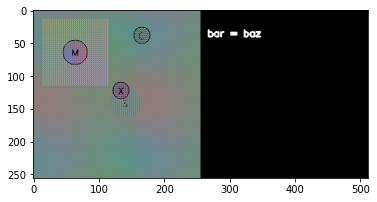

In [2]:
rgb_renderer.reset()
img_arr = rgb_renderer(results=dict(bar='baz'))
image = PIL.Image.fromarray(img_arr)
plt.imshow(image)

At the moment, the color renderer is only meant for visualization. The
pattern-based renderer is more designed for use with agents that have
pixel-based RGB observations. The visual features are patterns derived from
features from an autoencoder trained to reconstruct states drawn from a product of marginals. We have included annotation in both of these renderers for human-consumption; the annotation and the right area with the results are not normally visible to the agent.

Note: there is an additional renderer available constructed from features pulled out of a pretrained Inception model trained on Imagenet. 
The rendering is very extensible, and a user can define their own generator.

The generative model of visual features is from a preset model, in this case
 a `baseline` generative model. There are two additional sets: `five` and
 `twenty` which contain 5 and 20 generative models respectively:

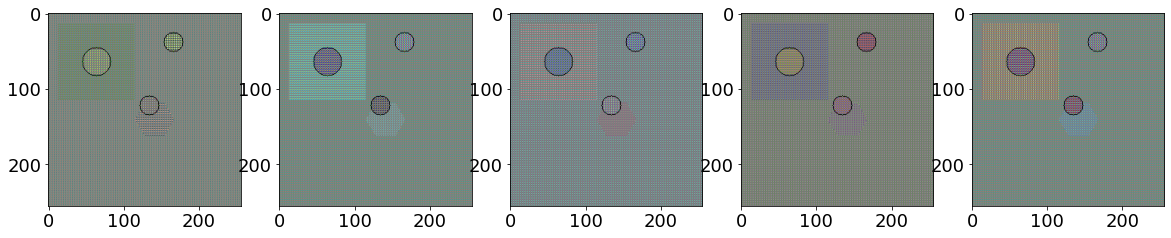

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18, 'text.color': 'white'})

plt.figure(figsize=(20, 10))

visual_config = get_env_config('visual', 'linear_ae', dist_name='five')

rgb_renderer_close = RGBTextureRenderer(res=256, config=visual_config)

for i in range(5):
    rgb_renderer_close.sample()
    rgb_renderer_close.reset()
    img_arr = rgb_renderer_close()
    image = PIL.Image.fromarray(img_arr)
    plt.subplot(1, 5, i + 1)

    plt.imshow(image)

The `inception_linear` renderer has a `baseline`, `close` and `far`
rendering set, where "close" and "far" is determined by the Wasserstein-2
distance of the baseline parameters from those in the sets. This allows
the researcher to define generalization experiments w.r.t. the distance
of visual features from a fixed baseline.

### Obscuring factors in visual features.

SEGAR renderers also are capable of obscuring visual features, such that they
wont be visible to the agent.

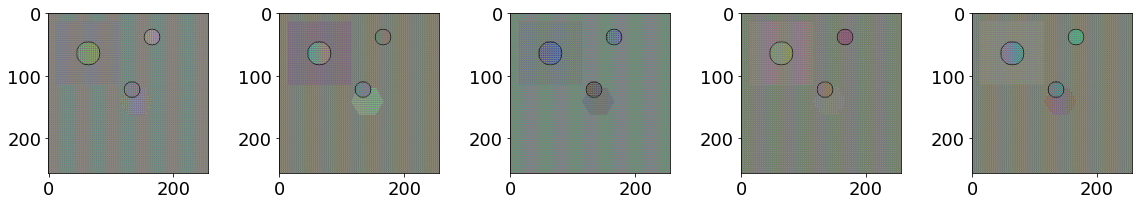

In [6]:
from segar.factors import Heat
plt.close()
fig = plt.figure(figsize=(20, 10))

visual_config = get_env_config('visual', 'linear_ae', dist_name='five')

rgb_renderer_close = RGBTextureRenderer(res=256, config=visual_config,
                                        filter_factors=[Heat])

for i in range(5):
    rgb_renderer_close.sample()
    rgb_renderer_close.reset()
    img_arr = rgb_renderer_close()
    image = PIL.Image.fromarray(img_arr)
    plt.subplot(3, 5, i + 1)

    plt.imshow(image)